<a href="https://colab.research.google.com/github/yasirarism/K-Mean-Clustering-Dengan-Python/blob/main/K_Means_Clutering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teknik Sipil = 1  
Sistem Informasi = 2  
Teknik Industri = 3  
  
Belum ada ijazah = 1  
SMA = 2  
SMK = 3  
Selain SMK dan SMA = 4  
  
Nilai rata rata <= 5 = 1  
Nilai rata rata > 5 = 2  
Nilai rata rata >= 7 = 3  

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel("https://github.com/yasirarism/K-Mean-Clustering-Dengan-Python/raw/main/Sample%20Data%20Mahasiswa%20Baru%20v2.xlsx")
data.head()

,NAMA,FAKULTAS,PRODI,ASAL_SEKOLAH,Nilai_UAN
0,ADE SAPUTRA,TIK,1,4,1
1,KAMARUDIN,TIK,1,2,1
2,REZA TRYADITYA,TIK,1,2,1
3,M.YOGA ALI AKBAR,TIK,1,2,1
4,ANDI SEPTIAWAN,TIK,1,2,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAMA          27 non-null     object
 1   FAKULTAS      27 non-null     object
 2   PRODI         27 non-null     int64 
 3   ASAL_SEKOLAH  27 non-null     int64 
 4   Nilai_UAN     27 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [40]:
data = data.drop(["NAMA","FAKULTAS"], axis=1)
data

,PRODI,ASAL_SEKOLAH,Nilai_UAN
0,1,4,1
1,1,2,1
2,1,2,1
3,1,2,1
4,1,2,1
5,1,1,1
6,1,2,1
7,2,2,1
8,2,2,1
9,2,1,1


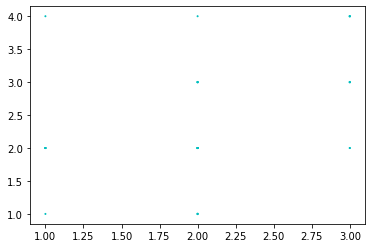

In [54]:
plt.scatter(data.PRODI , data.ASAL_SEKOLAH, data.Nilai_UAN, c = "c", marker = "o", alpha = 1)
plt.show()

In [55]:
data_x = data.iloc[:, 0:2]
data_x.head()

,PRODI,ASAL_SEKOLAH
0,1,4
1,1,2
2,1,2
3,1,2
4,1,2


In [56]:
x_array = np.array(data_x)
print(x_array)

[[1 4]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [2 1]
 [2 3]
 [2 2]
 [2 1]
 [2 4]
 [2 2]
 [2 3]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [3 2]
 [3 4]
 [3 2]
 [3 3]
 [3 4]]


In [57]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 1.        ],
       [0.        , 0.33333333],
       [0.        , 0.33333333],
       [0.        , 0.33333333],
       [0.        , 0.33333333],
       [0.        , 0.        ],
       [0.        , 0.33333333],
       [0.5       , 0.33333333],
       [0.5       , 0.33333333],
       [0.5       , 0.        ],
       [0.5       , 0.66666667],
       [0.5       , 0.33333333],
       [0.5       , 0.        ],
       [0.5       , 1.        ],
       [0.5       , 0.33333333],
       [0.5       , 0.66666667],
       [0.5       , 0.66666667],
       [0.5       , 0.33333333],
       [0.5       , 0.33333333],
       [0.5       , 0.33333333],
       [0.5       , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 0.33333333],
       [1.        , 1.        ],
       [1.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

In [59]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)
print(kmeans.cluster_centers_)

[[0.         0.27777778]
 [0.5        0.26666667]
 [1.         0.83333333]
 [0.4        0.8       ]
 [1.         0.33333333]]


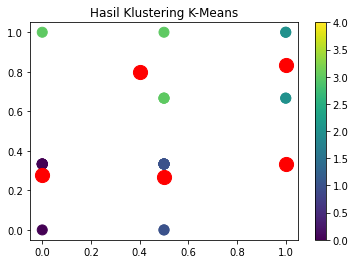

In [68]:
data["kluster"] = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()